In [2]:
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import keras
import numpy as np
from keras import layers, optimizers, callbacks, preprocessing
from sklearn.metrics import confusion_matrix


In [ ]:
EPOCH = 300

train_data = preprocessing.image_dataset_from_directory(
    '/Users/rudisargueta/Documents/Alzheimer_CNN/AlzheimersDataset/train',   
    validation_split=.2, 
    labels='inferred', 
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32, 
    seed=1337,
    image_size=(128, 128),
    shuffle=True,
    subset='training',
)

val_data = preprocessing.image_dataset_from_directory(
    '/Users/rudisargueta/Documents/Alzheimer_CNN/AlzheimersDataset/train',   
    validation_split=.2, 
    labels='inferred', 
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32, 
    seed=1337,
    image_size=(128, 128),
    shuffle= True,
    subset='validation',
)


test_data = preprocessing.image_dataset_from_directory(
    '/Users/rudisargueta/Documents/Alzheimer_CNN/AlzheimersDataset/test',    
    labels='inferred', 
    label_mode='categorical',
    color_mode='grayscale',
   batch_size=32, 
    seed=1337,
    image_size=(128, 128),
)

class_names = ['MildDementia', 'NonDementia', 'VeryMildDementia']
train_data.class_names = class_names
val_data.class_names = class_names

Found 5121 files belonging to 3 classes.
Using 4097 files for training.
Found 5121 files belonging to 3 classes.
Using 1024 files for validation.
Found 1279 files belonging to 3 classes.


2024-04-30 10:35:50.349780: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-04-30 10:35:50.349802: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-04-30 10:35:50.349805: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-04-30 10:35:50.349838: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-30 10:35:50.349859: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
optimizer = optimizers.Adam(learning_rate=1e-4)
save_best_model = callbacks.ModelCheckpoint('best_cnn_model.keras', save_best_only=True)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

model = keras.models.Sequential()
model.add(layers.Input(shape=(128,128,1)))
model.add(layers.RandomFlip(mode='horizontal'))
model.add(layers.RandomZoom(0.05, fill_mode='nearest'))
model.add(layers.RandomContrast(0.05))
model.add(layers.RandomRotation(0.05, fill_mode='nearest'))
model.add(layers.RandomTranslation(0.05, 0.05, fill_mode='nearest'))    
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 'auc', 'f1_score']
)

history = model.fit(train_data, validation_data=val_data, epochs= EPOCH)
    


Epoch 1/300


2024-04-30 10:35:51.719013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-30 10:35:52.035987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3990 - auc: 0.5683 - f1_score: 0.3278 - loss: 3.7658

2024-04-30 10:36:00.158100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


129/129 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.3993 - auc: 0.5686 - f1_score: 0.3279 - loss: 3.7519 - val_accuracy: 0.5137 - val_auc: 0.7170 - val_f1_score: 0.2701 - val_loss: 0.9717
Epoch 2/300
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.4896 - auc: 0.6919 - f1_score: 0.3462 - loss: 1.0006 - val_accuracy: 0.5332 - val_auc: 0.7374 - val_f1_score: 0.3646 - val_loss: 0.9302
Epoch 3/300
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.5121 - auc: 0.7204 - f1_score: 0.3576 - loss: 0.9511 - val_accuracy: 0.5420 - val_auc: 0.7532 - val_f1_score: 0.4032 - val_loss: 0.9303
Epoch 4/300
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.5076 - auc: 0.7157 - f1_score: 0.3797 - loss: 0.9576 - val_accuracy: 0.5371 - val_auc: 0.7436 - val_f1_score: 0.4672 - val_loss: 0.9506
Epoch 5/300
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.5252 - auc: 0.7297 - f1_score: 0.3983 - loss: 0.9313 - val_accuracy: 0.5537 - val_auc: 0.7563 - val_f1_score: 0.3887 - val_loss

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6752 - auc: 0.8268 - f1_score: 0.6626 - loss: 1.9249
[2.0089776515960693, 0.6833463907241821, 0.826530933380127, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6196319 , 0.72440946, 0.6593204 ], dtype=float32)>]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


2024-04-30 11:14:48.496262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

2024-04-30 11:14:49.785938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


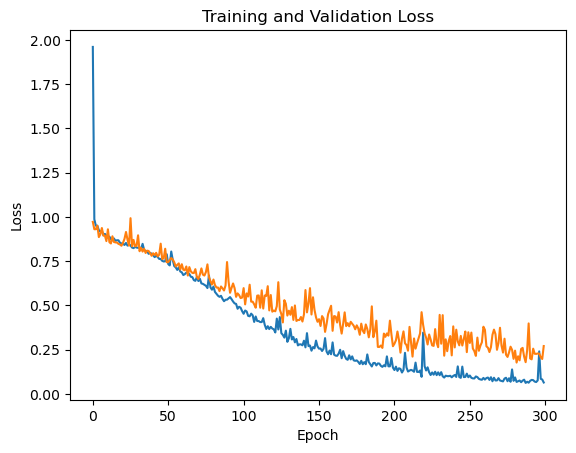

[[101  17  17]
 [ 17 414  72]
 [ 73 209 359]]


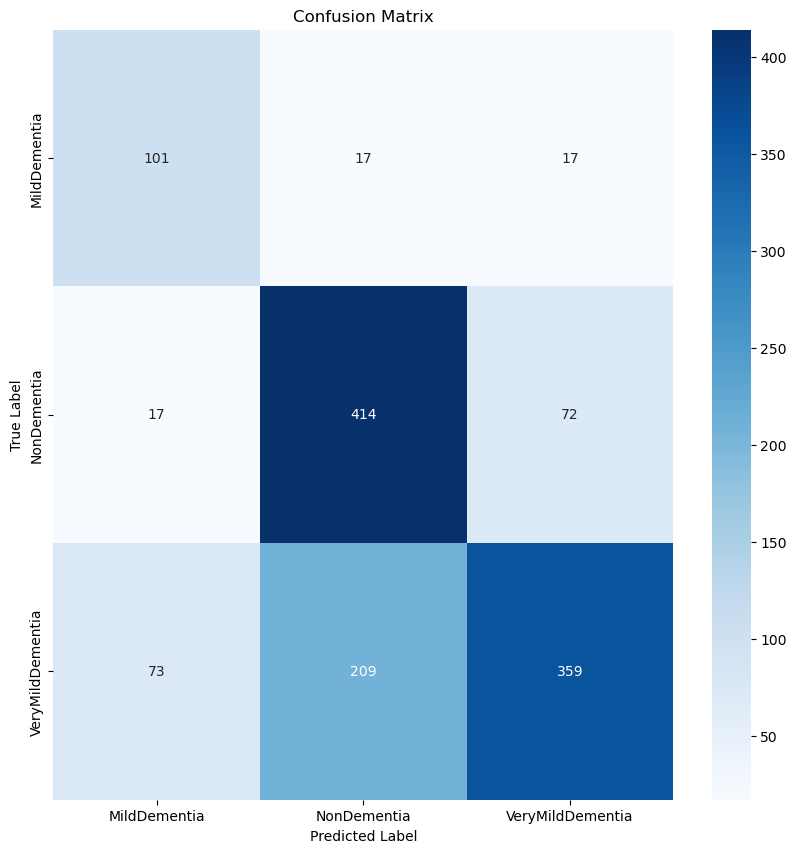

In [ ]:
evaluate = model.evaluate(test_data)
print(evaluate)


predictions = np.array([])
labels =  np.array([])
for x, y in test_data:
    predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

confusion = confusion_matrix(predictions, labels)


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Valadation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()




print(confusion)
plt.figure(figsize=(10,10))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()